# 1)DATA PROCESSING

In [1]:
#including lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualisation-matlab and seaborn
import seaborn as sns

#### USE THIS CODE FOR GOOGLE COLOB TO IMPORT THE DATASET
#importing database

url='https://raw.githubusercontent.com/sachita15/PROJECT-ENGAGE/main/cars_engage_2022.csv'

dataset=pd.read_csv(url)

dataset=dataset.drop("Unnamed: 0",axis=1)

dataset.head()

In [2]:
# importing database
dataset=pd.read_csv('cars_engage_2022.csv')
dataset=dataset.drop("Unnamed: 0",axis=1)
dataset.head()

Make      Model  Variant Ex-Showroom_Price Displacement  Cylinders  \
0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc        2.0   
1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc        2.0   
2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc        2.0   
3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc        2.0   
4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RWD (Rear Wheel Drive)                In-line   
1                  2.0  RWD (Rear Wheel Drive)                In-line   
2                  2.0  RWD (Rear Wheel Drive)                In-line   
3                  2.0  RWD (Rear Wheel Drive)                In-line   
4                  2.0  RWD (Rear Wheel Drive)                In-line   

  Emission_Norm  ... Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
0         BS IV  ...                      NaN                 NaN         NaN   
1         BS IV  ...                      NaN                 NaN         NaN   
2         BS IV  ...                      NaN                 NaN         NaN   
3         BS IV  ...                      NaN                 NaN         NaN   
4         BS IV  ...                      NaN                 NaN         NaN   

  ASR_/_Traction_Control Cruise_Control USB_Ports Heads-Up_Display  \
0                    NaN            NaN       NaN              NaN   
1                    NaN            NaN       NaN              NaN   
2                    NaN            NaN       NaN              NaN   
3                    NaN            NaN       NaN              NaN   
4                    NaN            NaN       NaN              NaN   

  Welcome_Lights  Battery Electric_Range  
0            NaN      NaN            NaN  
1            NaN      NaN            NaN  
2            NaN      NaN            NaN  
3            NaN      NaN            NaN  
4            NaN      NaN            NaN  

[5 rows x 140 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


## 1.1) CLEANING OF DATA

Here we see that many columns are not needed. Also there are some columns which have more than 30% missing values. So it is better to remove these columns to improve our analysis.
Also for column Fuel_System we see it is Injection throughout the dataset.So we can remove it.
So it the case with many columns.So we will remove them as well. Later on we will group cars on the basis of these common features and compare their prices.

In [4]:
dataset=dataset.drop(['Fuel_System','Odometer','Speedometer','Tripmeter','Start_/_Stop_Button','Aux-in_Compatibility','Average_Fuel_Consumption','Bluetooth','CD_/_MP3_/_DVD_Player','Central_Locking','Child_Safety_Locks','Clock','Distance_to_Empty','Engine_Malfunction_Light','FM_Radio','Handbrake','Low_Fuel_Warning','Multifunction_Display','Third_Row_AC_Vents','Auto-Dimming_Rear-View_Mirror','Hill_Assist','Gear_Indicator','Seat_Back_Pockets','ABS_(Anti-lock_Braking_System)','Airbags','Headlight_Reminder','Door_Ajar_Warning','EBD_(Electronic_Brake-force_Distribution)','Fasten_Seat_Belt_Warning','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility','Cigarette_Lighter','Average_Speed','EBA_(Electronic_Brake_Assist)','Navigation_System','Second_Row_AC_Vents','iPod_Compatibility','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box','Turbocharger','ISOFIX_(Child-Seat_Mount)','Rain_Sensing_Wipers','Leather_Wrapped_Steering','Automatic_Headlamps','ASR_/_Traction_Control','Cruise_Control'],axis=1)
df = dataset[[column for column in dataset if dataset[column].count() / len(dataset) >= 0.3]] 
DF=dataset[[column for column in dataset if dataset[column].count() / len(dataset) <= 0.3]]# later on we will use this list to group cars
print("List of dropped columns:", end=" ")
for c in dataset.columns:
    if c not in df.columns:
        print(c, end=", ")
print('\n')
dataset = df

List of dropped columns: ARAI_Certified_Mileage_for_CNG, 3_Point_Seat-Belt_in_Middle_Rear_Seat, Ambient_Lightning, Cargo/Boot_Lights, Drive_Modes, High_Speed_Alert_System, Lane_Watch_Camera/_Side_Mirror_Camera, Passenger_Side_Seat-Belt_Reminder, Voice_Recognition, Walk_Away_Auto_Car_Lock, Compression_Ratio, Other_Specs, Other_specs, Android_Auto, Apple_CarPlay, Tyre_Pressure_Monitoring_System, Recommended_Tyre_Pressure, Heated_Seats, Paddle_Shifters, Engine_Type, USB_Ports, Heads-Up_Display, Welcome_Lights, Battery, Electric_Range, 



By looking at our dataset that only Ex-showrrom_Price can be treated as independent varaible. So lets shift it to the last column.

In [5]:
#lets look at our edited dataset also lets shift exshowroom price to last column since we can use he given data to predict the ex-showroom price of a car on the basis of its given features.  
def reorder_columns(dataframe, col_name, position):
    temp_col = dataframe[col_name]
    dataframe = dataframe.drop(columns=[col_name])
    dataframe.insert(loc=position, column=col_name, value=temp_col)
    return dataframe
dataset = reorder_columns(dataframe=dataset, col_name='Ex-Showroom_Price', position=67)
dataset.head()

Make      Model  Variant Displacement  Cylinders  Valves_Per_Cylinder  \
0  Tata  Nano Genx       Xt       624 cc        2.0                  2.0   
1  Tata  Nano Genx       Xe       624 cc        2.0                  2.0   
2  Tata  Nano Genx  Emax Xm       624 cc        2.0                  2.0   
3  Tata  Nano Genx      Xta       624 cc        2.0                  2.0   
4  Tata  Nano Genx       Xm       624 cc        2.0                  2.0   

               Drivetrain Cylinder_Configuration Emission_Norm  \
0  RWD (Rear Wheel Drive)                In-line         BS IV   
1  RWD (Rear Wheel Drive)                In-line         BS IV   
2  RWD (Rear Wheel Drive)                In-line         BS IV   
3  RWD (Rear Wheel Drive)                In-line         BS IV   
4  RWD (Rear Wheel Drive)                In-line         BS IV   

    Engine_Location  ... Adjustable_Headrests Gross_Vehicle_Weight  \
0  Rear, Transverse  ...                  NaN                  NaN   
1  Rear, Transverse  ...                  NaN                  NaN   
2  Rear, Transverse  ...                  NaN                  NaN   
3  Rear, Transverse  ...                  NaN                  NaN   
4  Rear, Transverse  ...                  NaN                  NaN   

  Number_of_Airbags Adjustable_Steering_Column Parking_Assistance  \
0               NaN                        NaN                NaN   
1               NaN                        NaN                NaN   
2               NaN                        NaN                NaN   
3               NaN                        NaN                NaN   
4               NaN                        NaN                NaN   

  Infotainment_Screen  Multifunction_Steering_Wheel Seat_Height_Adjustment  \
0                 NaN                           NaN                    NaN   
1                 NaN                           NaN                    NaN   
2                 NaN                           NaN                    NaN   
3                 NaN                           NaN                    NaN   
4                 NaN                           NaN                    NaN   

  Rear_Center_Armrest Ex-Showroom_Price  
0                 NaN      Rs. 2,92,667  
1                 NaN      Rs. 2,36,447  
2                 NaN      Rs. 2,96,661  
3                 NaN      Rs. 3,34,768  
4                 NaN      Rs. 2,72,223  

[5 rows x 68 columns]

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Make                          1201 non-null   object 
 1   Model                         1276 non-null   object 
 2   Variant                       1276 non-null   object 
 3   Displacement                  1264 non-null   object 
 4   Cylinders                     1210 non-null   float64
 5   Valves_Per_Cylinder           1174 non-null   float64
 6   Drivetrain                    1269 non-null   object 
 7   Cylinder_Configuration        1263 non-null   object 
 8   Emission_Norm                 1265 non-null   object 
 9   Engine_Location               1233 non-null   object 
 10  Fuel_Tank_Capacity            1207 non-null   object 
 11  Fuel_Type                     1276 non-null   object 
 12  Height                        1275 non-null   object 
 13  Len

## 1.2) DENSITY PLOT 

We will plot density plot of Ex-Showroom_Price. So by plotting this we can see the probabilty of getting a particular Ex-Showroom_Price.

count    1.276000e+03
mean     4.596538e+06
std      1.214735e+07
min      2.364470e+05
25%      7.438760e+05
50%      1.060064e+06
75%      2.979828e+06
max      2.121554e+08
Name: Ex-Showroom_Price, dtype: float64


/var/folders/pn/bwny75js2dnb1y5h8lpntpqr0000gn/T/ipykernel_5639/2009258471.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["Ex-Showroom_Price"]=dataset["Ex-Showroom_Price"].str.replace("[Rs. ]","")#removing char Rs. from it
/Users/sachitagupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


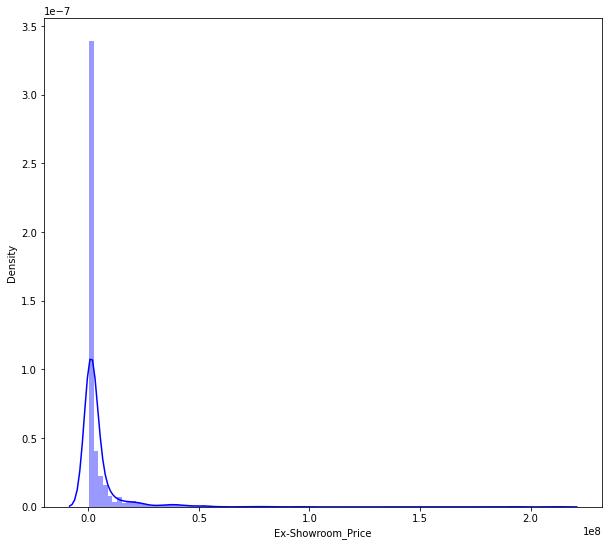

In [7]:
#now lets see how Ex-Showroom_Price is distributed.
#but since it is in string type so lests convert it into float dtype.
dataset["Ex-Showroom_Price"]=dataset["Ex-Showroom_Price"].str.replace("[Rs. ]","")#removing char Rs. from it
dataset["Ex-Showroom_Price"]=dataset["Ex-Showroom_Price"].str.replace(",","")# removing , from it
dataset['Ex-Showroom_Price'] = dataset['Ex-Showroom_Price'].astype(float) #converting it to float
print(dataset['Ex-Showroom_Price'].describe())
plt.figure(figsize=(10, 9))
sns.distplot(dataset['Ex-Showroom_Price'], color='b', bins=100, hist_kws={'alpha': 0.4});

### OBSERVATION
Here we see that as we change the bins size the peak of graph changes,i.e if we decrease the bin size then the peak of graph decreases.

We see that the above graph is skewed, so maybe the appropriate distribution can be log or log normal distribution.

Here density represents frequency of Ex-Showroom_Price

In [8]:
#observing all numerical data
dataset.describe()

Cylinders  Valves_Per_Cylinder        Doors  Seating_Capacity  \
count  1210.000000          1174.000000  1272.000000       1270.000000   
mean      4.380992             3.977853     4.550314          5.270079   
std       1.660957             0.833763     0.747816          1.145231   
min       2.000000             1.000000     2.000000          2.000000   
25%       4.000000             4.000000     4.000000          5.000000   
50%       4.000000             4.000000     5.000000          5.000000   
75%       4.000000             4.000000     5.000000          5.000000   
max      16.000000            16.000000     5.000000         16.000000   

       Number_of_Airbags  Ex-Showroom_Price  
count        1141.000000       1.276000e+03  
mean            3.787029       4.596538e+06  
std             2.522399       1.214735e+07  
min             1.000000       2.364470e+05  
25%             2.000000       7.438760e+05  
50%             2.000000       1.060064e+06  
75%             6.000000       2.979828e+06  
max            14.000000       2.121554e+08

# 2) DATA VISUALIZATION

## 2.1) ANALYZYING NON NUMERICAL DATA

In [9]:
#observing all data
dataset.describe(include='all')

Make  Model Variant Displacement    Cylinders  \
count            1201   1276    1276         1264  1210.000000   
unique             39    263    1064          129          NaN   
top     Maruti Suzuki  Nexon     Lxi      1197 cc          NaN   
freq              149     24       9          108          NaN   
mean              NaN    NaN     NaN          NaN     4.380992   
std               NaN    NaN     NaN          NaN     1.660957   
min               NaN    NaN     NaN          NaN     2.000000   
25%               NaN    NaN     NaN          NaN     4.000000   
50%               NaN    NaN     NaN          NaN     4.000000   
75%               NaN    NaN     NaN          NaN     4.000000   
max               NaN    NaN     NaN          NaN    16.000000   

        Valves_Per_Cylinder               Drivetrain Cylinder_Configuration  \
count           1174.000000                     1269                   1263   
unique                  NaN                        4                      4   
top                     NaN  FWD (Front Wheel Drive)                In-line   
freq                    NaN                      887                   1077   
mean               3.977853                      NaN                    NaN   
std                0.833763                      NaN                    NaN   
min                1.000000                      NaN                    NaN   
25%                4.000000                      NaN                    NaN   
50%                4.000000                      NaN                    NaN   
75%                4.000000                      NaN                    NaN   
max               16.000000                      NaN                    NaN   

       Emission_Norm    Engine_Location  ... Adjustable_Headrests  \
count           1265               1233  ...                 1026   
unique             4                  7  ...                    6   
top            BS IV  Front, Transverse  ...             All Rows   
freq             879                804  ...                  701   
mean             NaN                NaN  ...                  NaN   
std              NaN                NaN  ...                  NaN   
min              NaN                NaN  ...                  NaN   
25%              NaN                NaN  ...                  NaN   
50%              NaN                NaN  ...                  NaN   
75%              NaN                NaN  ...                  NaN   
max              NaN                NaN  ...                  NaN   

       Gross_Vehicle_Weight Number_of_Airbags Adjustable_Steering_Column  \
count                   681       1141.000000                       1085   
unique                  172               NaN                          4   
top                 2510 kg               NaN                Rake, Reach   
freq                     30               NaN                        541   
mean                    NaN          3.787029                        NaN   
std                     NaN          2.522399                        NaN   
min                     NaN          1.000000                        NaN   
25%                     NaN          2.000000                        NaN   
50%                     NaN          2.000000                        NaN   
75%                     NaN          6.000000                        NaN   
max                     NaN         14.000000                        NaN   

              Parking_Assistance Infotainment_Screen  \
count                        986                 814   
unique                        10                   2   
top     Rear sensors with camera     Touch Sensitive   
freq                         367                 737   
mean                         NaN                 NaN   
std                          NaN                 NaN   
min                          NaN                 NaN   
25%                          NaN                 NaN   
50%                          

#### OBSERVATION:
-We observe that maximum cars in our dataset are of maruti suzuki

### 2.1 a)LETS PLOT Make AND Ex-Showroom_Price:

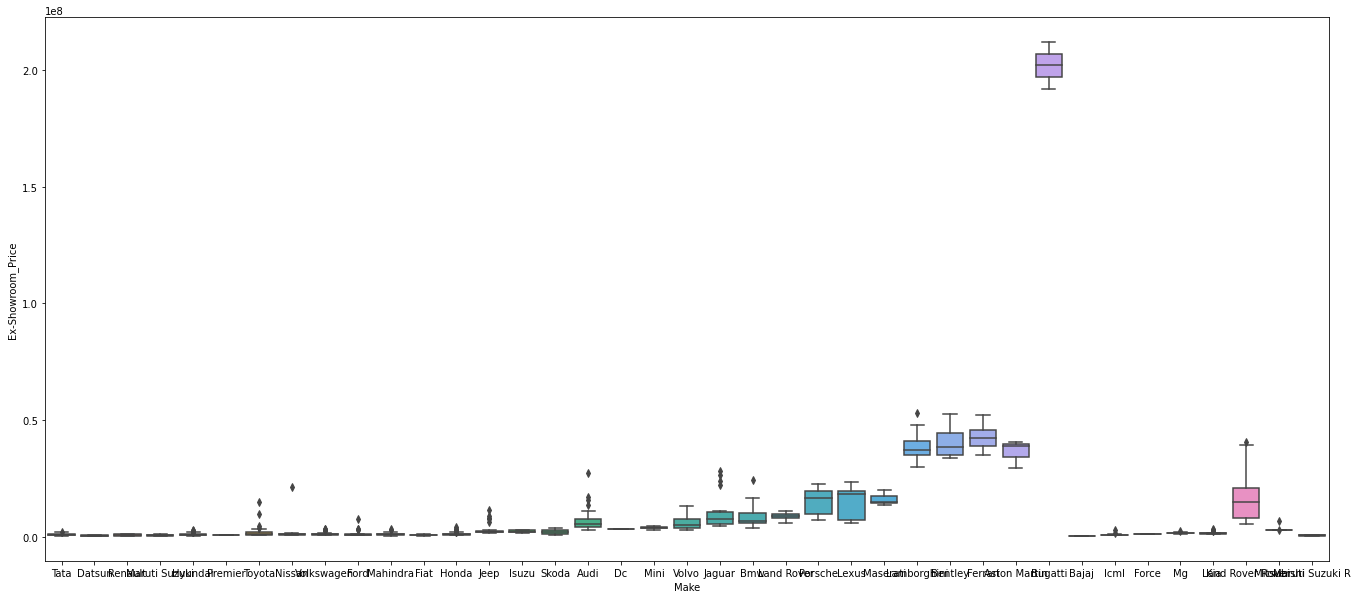

In [10]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Make", y="Ex-Showroom_Price", data=dataset)

### 2.1 b) LETS PLOT Body_Type AND Ex-Showroom_Price:

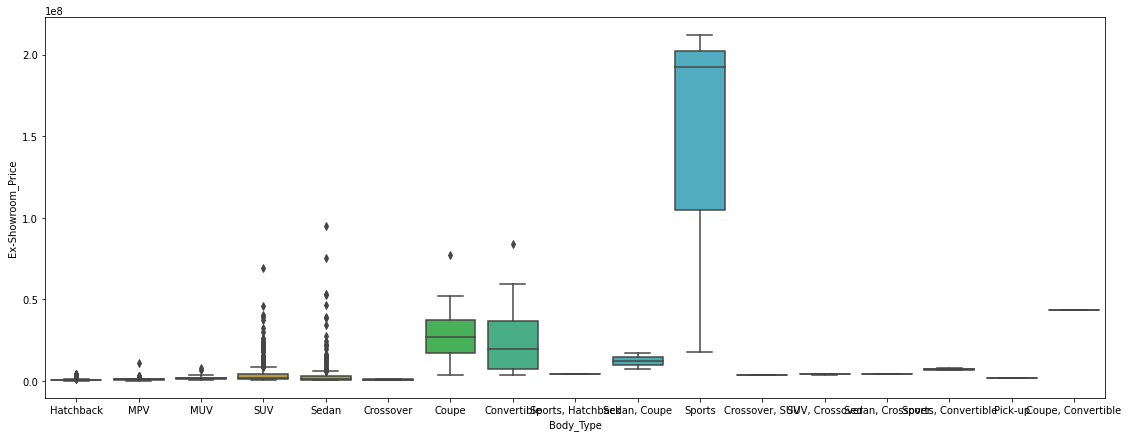

In [11]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="Body_Type", y="Ex-Showroom_Price", data=dataset)

Here we dont get much idea from seeing the above graph. So lets use catplot and see if we can find some insights

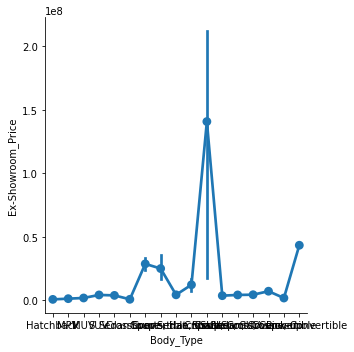

In [12]:
sns.catplot(data=dataset, x="Body_Type", y="Ex-Showroom_Price",kind="point",axis=0)

### 2.1 c) LETS PLOT Drivetrain AND Ex-Showroom_Price:

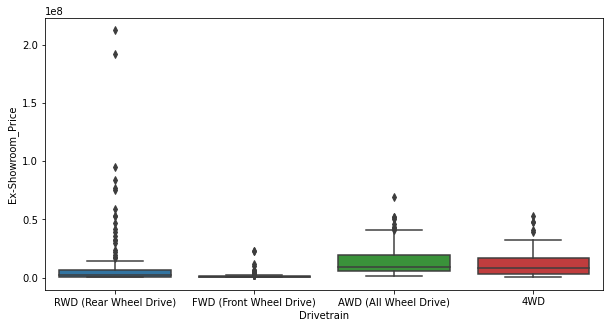

In [13]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="Drivetrain", y="Ex-Showroom_Price", data=dataset)

## 2.1(a,b,c) FINDINGS:

-Lamborghini,Bentley,Ferrari,Aston Martin,Bugatti produces most expensive cars( Rs. 3,00,00,000 and above)

-Volve Make, Jaguar,BMW,Maserati,Audi,Lexus make comparitevly less expensive luxury cars.

-Other companies like Tata,Maruti etc produce budget models with lower prices.

-Sports model are expensive in prices followed by convertible and coupe body style

-Convertible has only standard edition with expensive cars

-rwd wheel drive vehicle have expensive prices

# 2.2 ANALYZYING THE NUMERICAL DATA

## 2.2 a) DATA PROCESSING

In [14]:
#here we have three classes make,modeland varaint. 
#So lets convert them into 1 ,i.e model and remove others and then apply one hot coding on model to convert it into numerical data
dataset=dataset.drop(['Make','Variant'],axis=1)
dataset=pd.get_dummies(dataset,columns=['Model'])
dataset.head()

Displacement  Cylinders  Valves_Per_Cylinder              Drivetrain  \
0       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)   
1       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)   
2       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)   
3       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)   
4       624 cc        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration Emission_Norm   Engine_Location Fuel_Tank_Capacity  \
0                In-line         BS IV  Rear, Transverse          24 litres   
1                In-line         BS IV  Rear, Transverse          24 litres   
2                In-line         BS IV  Rear, Transverse          15 litres   
3                In-line         BS IV  Rear, Transverse          24 litres   
4                In-line         BS IV  Rear, Transverse          24 litres   

  Fuel_Type   Height  ... Model_Xf Model_Xj Model_Xl6  Model_Xuv300  \
0    Petrol  1652 mm  ...        0        0         0             0   
1    Petrol  1652 mm  ...        0        0         0             0   
2       CNG  1652 mm  ...        0        0         0             0   
3    Petrol  1652 mm  ...        0        0         0             0   
4    Petrol  1652 mm  ...        0        0         0             0   

  Model_Xuv500 Model_Xylo Model_Yaris Model_Z4 Roadster Model_Zest Model_Zs Ev  
0            0          0           0                 0          0           0  
1            0          0           0                 0          0           0  
2            0          0           0                 0          0           0  
3            0          0           0                 0          0           0  
4            0          0           0                 0          0           0  

[5 rows x 328 columns]

#### CONVERTING STRINGS INTO FLOAT DType

Now we see that most of our numerical data is in the form of strings. So here we will remove the strings and then convert the numerical data from dtype object to float.
eg- We have displacements as 624 cc;  so here we will remove ' cc' from it and then convert it into float type.
Then we will create a new dataset as 'dataset_num' which will contain all numerical data.

#### REMOVING STRINGS 

In [15]:
#but we know some numerical data is in form of dtype object so lets convert them into int type.
#first we will remove characters from various columns and replace , with . and convert ranges into their average
dataset["Displacement"]=dataset["Displacement"].str.replace("[cc]","")
dataset["Fuel_Tank_Capacity"]=dataset["Fuel_Tank_Capacity"].str.replace("[ litres]","")
dataset["Height"]=dataset["Height"].str.replace("[ mm]","")
dataset["Length"]=dataset["Length"].str.replace("[ mm]","")
dataset["Width"]=dataset["Width"].str.replace("[ mm]","")
dataset["City_Mileage"]=dataset["City_Mileage"].str.replace("[?]","")
dataset["City_Mileage"]=dataset["City_Mileage"].str.replace("[ km/litre]","")
dataset["City_Mileage"]=dataset["City_Mileage"].str.replace(",",".")
dataset["Highway_Mileage"]=dataset["Highway_Mileage"].str.replace("[ km/litre]","")
dataset["ARAI_Certified_Mileage"]=dataset["ARAI_Certified_Mileage"].str.replace("[ km/litre]","")
dataset["ARAI_Certified_Mileage"]=dataset["ARAI_Certified_Mileage"].str.replace("[p]","0")
dataset["Ground_Clearance"]=dataset["Ground_Clearance"].str.replace("[ mm]","")
dataset["Front_Track"]=dataset["Front_Track"].str.replace("[ mm]","")
dataset["Front_Track"]=dataset["Front_Track"].str.replace("[(R13)]","")
dataset["Front_Track"]=dataset["Front_Track"].str.replace(",",".")
dataset["Rear_Track"]=dataset["Rear_Track"].str.replace("[ mm]","")
dataset["Rear_Track"]=dataset["Rear_Track"].str.replace("[(R13)]","")
dataset["Rear_Track"]=dataset["Rear_Track"].str.replace(",",".")
dataset["Wheelbase"]=dataset["Wheelbase"].str.replace("[ mm]","")
dataset["Gross_Vehicle_Weight"]=dataset["Gross_Vehicle_Weight"].str.replace("[ kg]","")
dataset["Gross_Vehicle_Weight"]=dataset["Gross_Vehicle_Weight"].str.replace("[NA]","0")
dataset["Kerb_Weight"]=dataset["Kerb_Weight"].str.replace("[ kg]","")
dataset["Minimum_Turning_Radius"]=dataset["Minimum_Turning_Radius"].str.replace("[ meter]","")
dataset["Gears"]=dataset["Gears"].str.replace("[ Dual Clutch]","")
dataset["Gears"]=dataset["Gears"].str.replace("[SingeSpeedRedionGer]","1")
dataset.loc[304, 'City_Mileage'] = 12.6
dataset.loc[304, 'Highway_Mileage'] = 8.35
dataset.loc[304, 'ARAI_Certified_Mileage'] = 9.9
dataset.loc[353, 'ARAI_Certified_Mileage'] = 22.15
dataset.loc[183, 'Kerb_Weight'] = 1029.5
dataset.loc[184, 'Kerb_Weight'] = 1029.5
dataset.loc[185, 'Kerb_Weight'] = 1029.5
dataset.loc[192, 'Kerb_Weight'] = 1029.5
dataset.loc[193, 'Kerb_Weight'] = 1029.5
dataset.loc[194, 'Kerb_Weight'] = 1029.5
dataset.loc[186, 'Kerb_Weight'] = 1066.5
dataset.loc[187, 'Kerb_Weight'] = 1066.5
dataset.loc[188, 'Kerb_Weight'] = 1066.5
dataset.loc[189, 'Kerb_Weight'] = 1066.5
dataset.loc[190, 'Kerb_Weight'] = 1066.5
dataset.loc[195, 'Kerb_Weight'] = 1066.5

/var/folders/pn/bwny75js2dnb1y5h8lpntpqr0000gn/T/ipykernel_5639/1659532681.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["Displacement"]=dataset["Displacement"].str.replace("[cc]","")
/var/folders/pn/bwny75js2dnb1y5h8lpntpqr0000gn/T/ipykernel_5639/1659532681.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["Fuel_Tank_Capacity"]=dataset["Fuel_Tank_Capacity"].str.replace("[ litres]","")
/var/folders/pn/bwny75js2dnb1y5h8lpntpqr0000gn/T/ipykernel_5639/1659532681.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["Height"]=dataset["Height"].str.replace("[ mm]","")
/var/folders/pn/bwny75js2dnb1y5h8lpntpqr0000gn/T/ipykernel_5639/1659532681.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["Length"]=dataset["Length"].str.replace("[ mm]","")
/var/folders/

#### Converting them into dtype float

In [16]:
dataset= dataset.astype({"Gears":'float',"Minimum_Turning_Radius":'float',"Kerb_Weight":'float',"Gross_Vehicle_Weight":'float',"Displacement":'float', "Fuel_Tank_Capacity":'float', "Height":'float', "Length":'float', "Width":'float',"Wheelbase":'float', "Rear_Track":'float', "Front_Track":'float', "Ground_Clearance":'float', "ARAI_Certified_Mileage":'float', "Highway_Mileage":'float', "City_Mileage":'float'})

In [17]:
list(set(dataset.dtypes.tolist()))

[dtype('O'), dtype('uint8'), dtype('float64')]

#### CREATING A NUMERICAL DATASET

In [18]:
dataset_num = dataset.select_dtypes(include = ['float64','uint8']) #as we are considering numerical data
dataset_num.head()

Displacement  Cylinders  Valves_Per_Cylinder  Fuel_Tank_Capacity  Height  \
0         624.0        2.0                  2.0                24.0  1652.0   
1         624.0        2.0                  2.0                24.0  1652.0   
2         624.0        2.0                  2.0                15.0  1652.0   
3         624.0        2.0                  2.0                24.0  1652.0   
4         624.0        2.0                  2.0                24.0  1652.0   

   Length   Width  Doors  City_Mileage  Highway_Mileage  ...  Model_Xf  \
0  3164.0  1750.0    5.0          23.6              NaN  ...         0   
1  3164.0  1750.0    5.0          23.6              NaN  ...         0   
2  3164.0  1750.0    4.0           NaN              NaN  ...         0   
3  3164.0  1750.0    5.0          23.6              NaN  ...         0   
4  3164.0  1750.0    5.0          23.6              NaN  ...         0   

   Model_Xj  Model_Xl6  Model_Xuv300  Model_Xuv500  Model_Xylo  Model_Yaris  \
0         0          0             0             0           0            0   
1         0          0             0             0           0            0   
2         0          0             0             0           0            0   
3         0          0             0             0           0            0   
4         0          0             0             0           0            0   

   Model_Z4 Roadster  Model_Zest  Model_Zs Ev  
0                  0           0            0  
1                  0           0            0  
2                  0           0            0  
3                  0           0            0  
4                  0           0            0  

[5 rows x 285 columns]

#### REPLACING NAN WITH MEDIAN

Since we are done with making a numerical dataset. Now we will replace the missing values in this dataset with median.
Here we are replacing nan with median since this is a bigdata and when we plotted the density graph of ex-showroom_price we saw that the graph was skewed. And we know that for skewed graph, median filler is preferrable.

In [19]:
#replacing nan with median
medianFiller= lambda x: x.fillna(x.median())
dataset_num=dataset_num.apply(medianFiller,axis=0)
dataset_num.head()

Displacement  Cylinders  Valves_Per_Cylinder  Fuel_Tank_Capacity  Height  \
0         624.0        2.0                  2.0                24.0  1652.0   
1         624.0        2.0                  2.0                24.0  1652.0   
2         624.0        2.0                  2.0                15.0  1652.0   
3         624.0        2.0                  2.0                24.0  1652.0   
4         624.0        2.0                  2.0                24.0  1652.0   

   Length   Width  Doors  City_Mileage  Highway_Mileage  ...  Model_Xf  \
0  3164.0  1750.0    5.0         23.60            17.19  ...         0   
1  3164.0  1750.0    5.0         23.60            17.19  ...         0   
2  3164.0  1750.0    4.0         15.29            17.19  ...         0   
3  3164.0  1750.0    5.0         23.60            17.19  ...         0   
4  3164.0  1750.0    5.0         23.60            17.19  ...         0   

   Model_Xj  Model_Xl6  Model_Xuv300  Model_Xuv500  Model_Xylo  Model_Yaris  \
0         0          0             0             0           0            0   
1         0          0             0             0           0            0   
2         0          0             0             0           0            0   
3         0          0             0             0           0            0   
4         0          0             0             0           0            0   

   Model_Z4 Roadster  Model_Zest  Model_Zs Ev  
0                  0           0            0  
1                  0           0            0  
2                  0           0            0  
3                  0           0            0  
4                  0           0            0  

[5 rows x 285 columns]

#### BIVARATE PLOT
A bivarate analysis among the different variables can be done using scatter matrix plots. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file

In [20]:
#sns.pairplot(dataset,diag_kind='kde')
#here we have 285 columns, so it will become difficult for us to plot the bivarate plot
#so we will find out its corelation and then plot the respective graphs

## 2.2 b)CORELATION

Lets use corelation to find which features are strongly corelated to Ex-Showroom_Price, so when we have change Ex-Showroom_Price we will know which values are to be changed much.

In [21]:
#Now we'll try to find which features are strongly correlated with Ex-Showroom_Price. 
#We'll store them in a var called golden_features_list.
dataset_num_corr = dataset_num.corr()['Ex-Showroom_Price'][:21]
golden_features_list = dataset_num_corr[abs(dataset_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Ex-Showroom_Price:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 strongly correlated values with Ex-Showroom_Price:
Cylinders       0.817001
Displacement    0.793142
Name: Ex-Showroom_Price, dtype: float64


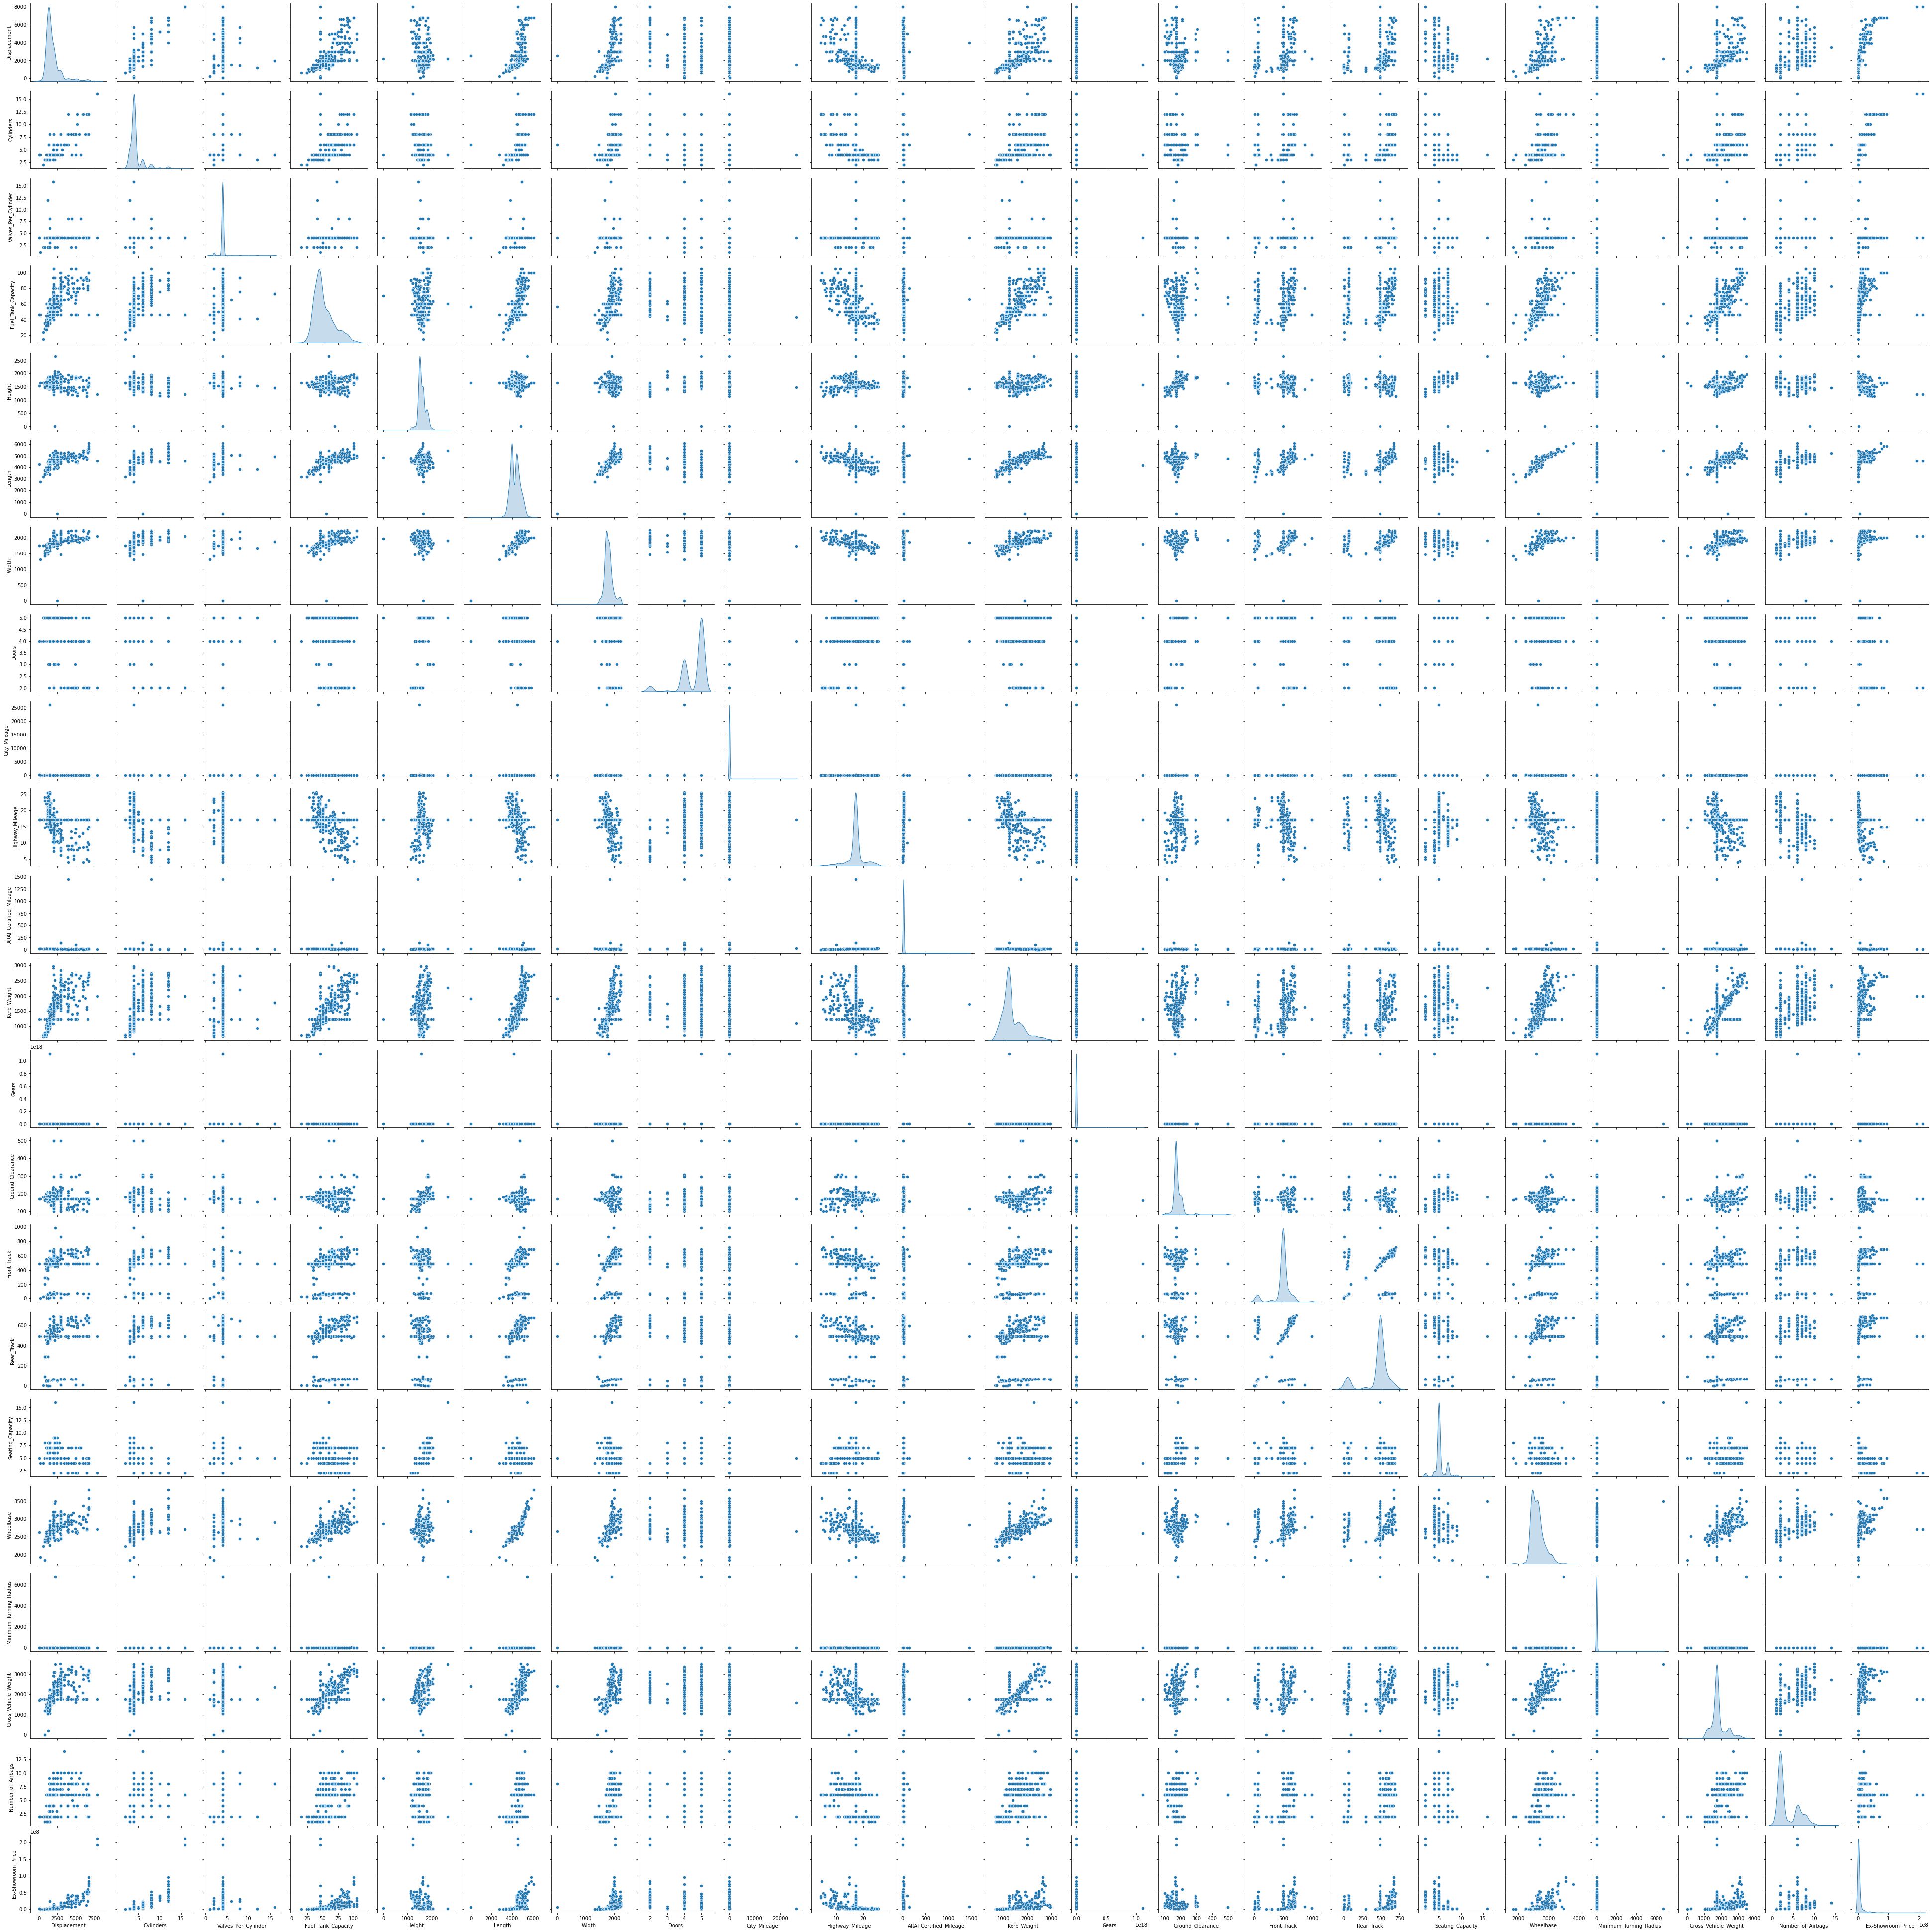

In [22]:
df_attr=dataset_num.iloc[:,0:22] # creating a dataset containing just the attributes
sns.pairplot(df_attr,diag_kind='kde') # syntax for if we want to choose some specific graphs
# here we are analysing curved graphs and st graphs differently starting with curved graphs

### OBSERVATION
We can clearly identify some relationships. Most of them seems to have a linear relationship with the exshowroom price and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the cars like airbags.
So now lets remove these 0 values and repeat the process of finding correlated values:

In [23]:
import operator
individual_features_df = []
for i in range(0, len(df_attr.columns) - 1): # -1 because the last column in df_attr is Ex-Showroom_Price
    tmpDf = df_attr[[df_attr.columns[i], 'Ex-Showroom_Price']]
    tmpDf = tmpDf[tmpDf[df_attr.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Ex-Showroom_Price'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

          Doors: -0.460310704910655
Seating_Capacity: -0.30715017408245104
Highway_Mileage: -0.3038232246038429
         Height: -0.18753873135185675
Ground_Clearance: -0.03262080078224966
ARAI_Certified_Mileage: -0.030337732634413087
   City_Mileage: -0.010298575918622727
Minimum_Turning_Radius: -0.0069961271892857125
          Gears: -0.005130990908957407
Valves_Per_Cylinder: 0.029752693724174478
     Rear_Track: 0.11245700474578217
    Front_Track: 0.11562365073226437
Gross_Vehicle_Weight: 0.31296852293721245
Number_of_Airbags: 0.33570962163803847
         Length: 0.40116227903409307
          Width: 0.4201659158226878
      Wheelbase: 0.42333017929007866
    Kerb_Weight: 0.4314434085051147
Fuel_Tank_Capacity: 0.45480511395052675
   Displacement: 0.793141979069912
      Cylinders: 0.8170011400554961


So after further cleaning our data we have got some more attributes which are strongly related to Ex-Showroom_Price
Now our golden_features_list var looks like this:

In [24]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with Ex-Showroom_Price:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with Ex-Showroom_Price:
['Displacement', 'Cylinders']


### OBSERVATION

Even after cleaning our data we got displacement and cylinders as strongly corelated attributes.

##  2.3)FEATURE TO FEATURE RELATION

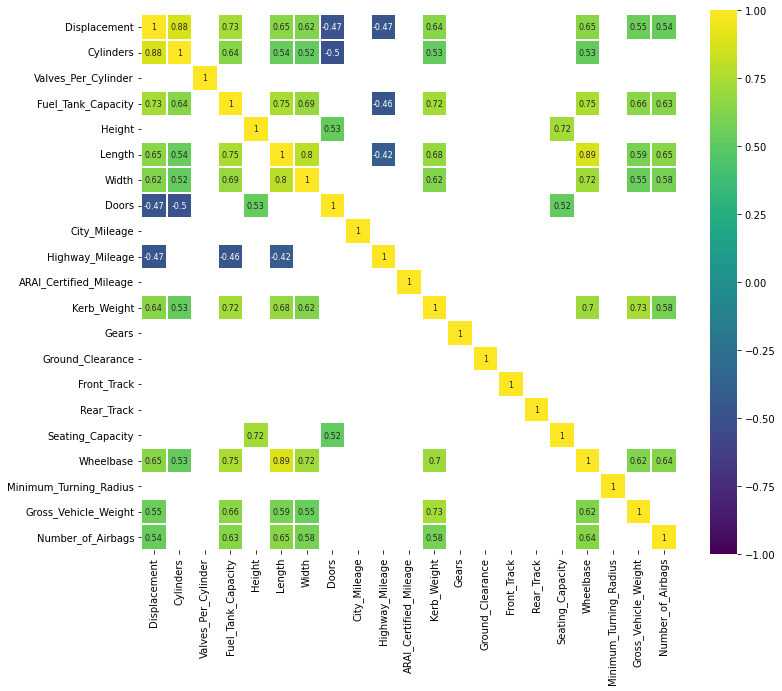

In [25]:
#Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret.\
#We can try to see if some variables are linked between each other and then explain their relation.
corr = df_attr.drop('Ex-Showroom_Price', axis=1).corr() # We already examined Ex-Showroom_Price correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### OBSERVATIONS:

A lot of features seems to be correlated with each other but some of them such as Displacement/Cylinder may just indicate a price inflation over the years. As for Length/Width, if the length of the car is increased then the width is also to be increased to maintain the shape of the car and similar is the case with Length/Wheelbase .

Now for the ones which are less obvious we can see that:
- There is a strong negative corelation between doors and cylinders of the car. But I really can't explain what it is.
-There is an interesting corelation between Fuel_Tank_Capacity and Length; Fuel_Tank_Capacity and Kerbs_Weight; Fuel_Tank_Capacity and Displacement, well this makes sense though.
-We can also relate Kerbs_Weight with Gross_vehicle_Weight
-It is interesting to note that Highway_Milage has negative corelation with Displacement,Fuel_Tank_Capacity and Length.

There is of course a lot more to discover but I can't really explain the rest of the features except the most obvious ones.

We can conclude that, by essence, some of those features may be combined between each other in order to reduce the number of features (like: Fuel_Tank_Capacity,Kerbs_Weight,Length,Displacement) and others indicates that people expect multiples features to be packaged together.

## 2.4)Quantitative to Quantitative relationship

Let's now examine the quantitative features of our dataframe and how they relate to the Ex-Showroom_Price which is also quantitative (hence the relation Quantitative -> Quantitative).

In [26]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Displacement            1276 non-null   float64
 1   Cylinders               1276 non-null   float64
 2   Valves_Per_Cylinder     1276 non-null   float64
 3   Fuel_Tank_Capacity      1276 non-null   float64
 4   Height                  1276 non-null   float64
 5   Length                  1276 non-null   float64
 6   Width                   1276 non-null   float64
 7   Doors                   1276 non-null   float64
 8   City_Mileage            1276 non-null   float64
 9   Highway_Mileage         1276 non-null   float64
 10  ARAI_Certified_Mileage  1276 non-null   float64
 11  Kerb_Weight             1276 non-null   float64
 12  Gears                   1276 non-null   float64
 13  Ground_Clearance        1276 non-null   float64
 14  Front_Track             1276 non-null   

Now here we see that all the elements in df_attr are quantitative elements. So lets begin. Also our strongly corelated elements were displacement and cylinder(golden_features_list). So lets see their distribution.

In [27]:
golden_features_list.append('Ex-Showroom_Price')
golden_features_list

['Displacement', 'Cylinders', 'Ex-Showroom_Price']

In [28]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ARAI_Certified_Mileage_for_CNG         27 non-null     object 
 1   3_Point_Seat-Belt_in_Middle_Rear_Seat  51 non-null     object 
 2   Ambient_Lightning                      56 non-null     object 
 3   Cargo/Boot_Lights                      121 non-null    object 
 4   Drive_Modes                            195 non-null    object 
 5   High_Speed_Alert_System                208 non-null    object 
 6   Lane_Watch_Camera/_Side_Mirror_Camera  66 non-null     object 
 7   Passenger_Side_Seat-Belt_Reminder      171 non-null    object 
 8   Voice_Recognition                      132 non-null    object 
 9   Walk_Away_Auto_Car_Lock                103 non-null    object 
 10  Compression_Ratio                      359 non-null    object 
 11  Othe

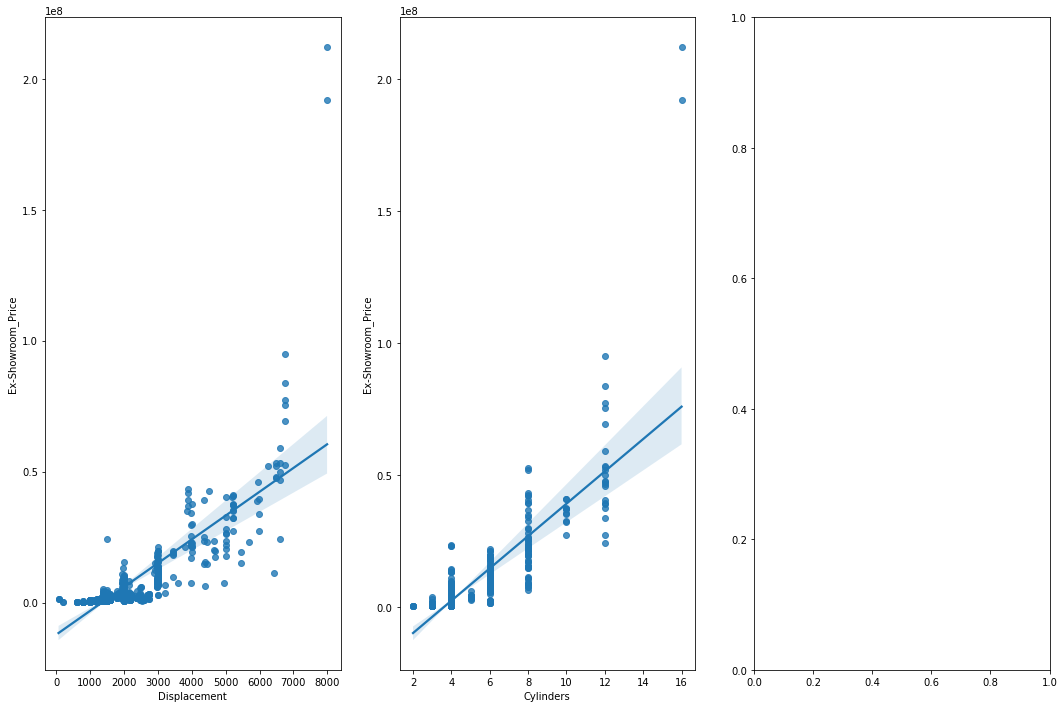

In [29]:
fig, ax = plt.subplots(round(len(golden_features_list) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(golden_features_list) - 1:
        sns.regplot(x=golden_features_list[i],y='Ex-Showroom_Price', data=df_attr[golden_features_list], ax=ax)

### OBSERVATION
We see that cylinders have a bigger spread area than displacement. So we can conclude that if more cylinders are there then the cost will be more and cylinders will affect the cost more than displacement

## 2.5)Categorical to Quantitative relationship 

Since all of the features in df_attr were quantitative elements so now all the remaining elements are categorical data. So let's analyze them

In [30]:
dataset['Ex-Showroom_Price'] = dataset['Ex-Showroom_Price'].astype(str)

In [31]:
dataset_categorical = dataset.select_dtypes(include = ['O'])
dataset_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Drivetrain                    1269 non-null   object
 1   Cylinder_Configuration        1263 non-null   object
 2   Emission_Norm                 1265 non-null   object
 3   Engine_Location               1233 non-null   object
 4   Fuel_Type                     1276 non-null   object
 5   Body_Type                     1270 non-null   object
 6   Front_Brakes                  1251 non-null   object
 7   Rear_Brakes                   1251 non-null   object
 8   Front_Suspension              1217 non-null   object
 9   Rear_Suspension               1230 non-null   object
 10  Front_Tyre_&_Rim              1227 non-null   object
 11  Rear_Tyre_&_Rim               1228 non-null   object
 12  Power_Steering                1219 non-null   object
 13  Power_Windows     

### Lets plot some of them:
Here we can only plot a few of them as many of them have missing values and since these are strings we cannot fill them.

/var/folders/pn/bwny75js2dnb1y5h8lpntpqr0000gn/T/ipykernel_5639/4285876663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categorical['Ex-Showroom_Price'] = dataset_categorical['Ex-Showroom_Price'].astype('float')


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Petrol'),
  Text(1, 0, 'CNG'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'CNG + Petrol'),
  Text(4, 0, 'Hybrid'),
  Text(5, 0, 'Electric')])

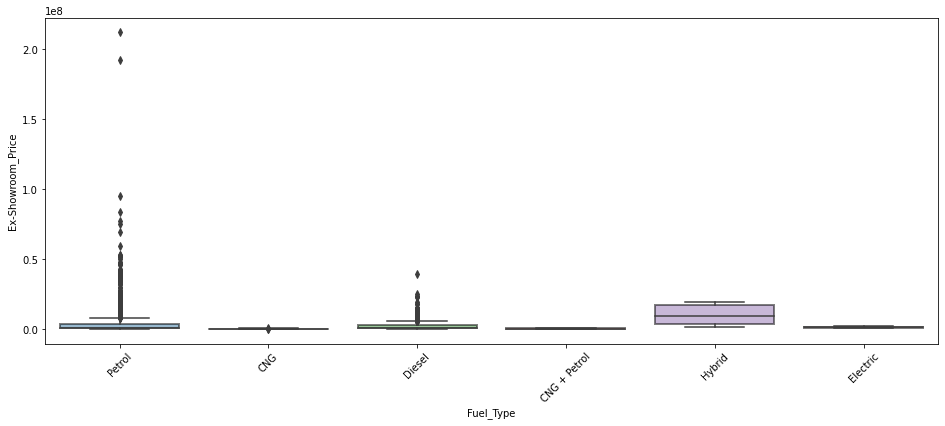

In [32]:
dataset_categorical['Ex-Showroom_Price'] = dataset_categorical['Ex-Showroom_Price'].astype('float')
plt.figure(figsize = (16, 6))
ax = sns.boxplot(x='Fuel_Type', y='Ex-Showroom_Price', data=dataset_categorical)
plt.setp(ax.artists, alpha=0.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### OBSERVATIONS
We see that fuel price is influencing exshowroom price like models with CNG,Electric fuel type will have less price.

Text(0, 0.5, 'power')

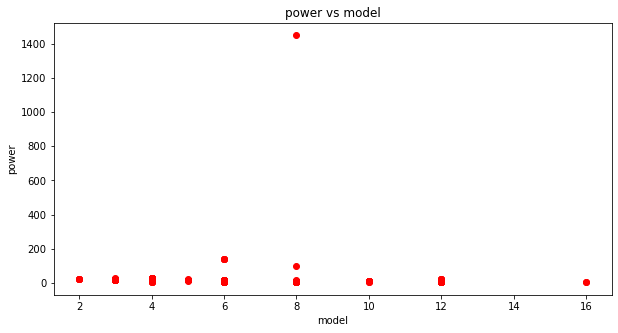

In [33]:
#also lets us analyaze power wrt model
x=dataset.iloc[:,1].values
y=dataset.iloc[:,16].values
plt.scatter(x,y,color='red')
plt.title('power vs model')
plt.xlabel('model')
plt.ylabel('power')

### OBSERVATIONS
Here we see how price rises when power is increased.
Also we see that for a particular model, all its varaint have same power.

## CONCLUSION

Till now we saw that the ex-showroom price is strongly corelated with cylinders and displacement.
But it is interesting to note that for a particular model say TATA-Nano Genx, its different varaints have same cylinders and displacement(ground clearance). But their price varies on the basis of milage,ARAI_Certified_Mileage_for_CNG, 3_Point_Seat-Belt_in_Middle_Rear_Seat, Ambient_Lightning, Cargo/Boot_Lights, Drive_Modes, High_Speed_Alert_System, Lane_Watch_Camera/_Side_Mirror_Camera, Passenger_Side_Seat-Belt_Reminder, Voice_Recognition, Walk_Away_Auto_Car_Lock, Compression_Ratio, Other_Specs, Other_specs, Android_Auto, Apple_CarPlay, Tyre_Pressure_Monitoring_System, Recommended_Tyre_Pressure, Heated_Seats, Paddle_Shifters, Engine_Type, USB_Ports, Heads-Up_Display, Welcome_Lights, Battery, Electric_Range.

Now these were the features which we removed in the beginning because they had more than 30% missing values.

- So we conclude that when we are comparing same model and different varaints, the price varies on the basis of the above features.
- When we are comparing different models then the price is affected by majorly cylinders and displacment in adition to other features.

As the price of the car increases, so does its features. 

# 3) APPLYING REGRESSION MODELS

We can also use our model to predict the ex-showroom price of a car with help of this dataset.
So lets apply some machine learning models and compare which model gives better results.

Till now we have analysed Ex-showroom room.
Now lets compare regression models.

#### IMPORTING DATASET

In [34]:
#importing the dataset :here we will use dataset_num as our dataset
#DECLARING FEATURES AND LABELS
x= dataset_num.drop(['Ex-Showroom_Price'],axis=1).values
y=dataset_num[['Ex-Showroom_Price']].values

#### Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
#here I am using random_state=0 because I will be using various models on this dataset, so using this will help
#me to get predictions on same set of training and testing data so that I can compare the results.

#### 3a) MULTIPLE LINEAR REGRESSION

In [36]:
#Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
#Predicting the Test set results
y_pred = regressor.predict(x_test)
#Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7045010813859726

#### 3b) DECISION TREE REGRESSION

In [37]:
# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)
#Predicting the Test set results
y_pred = regressor.predict(x_test)
#Evaluating the Model Performance
r2_score(y_test, y_pred)

0.8982186246276317

#### 3c) RANDOM FOREST REGRESSION

In [38]:
#Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
#Predicting the Test set results
y_pred = regressor.predict(x_test)
#Evaluating the Model Performance
r2_score(y_test, y_pred)

/var/folders/pn/bwny75js2dnb1y5h8lpntpqr0000gn/T/ipykernel_5639/3044583627.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


0.9335385231311853

#### FEATURE SCALLING

In [39]:
#FEATURE SCALLING
Y=dataset_num[['Ex-Showroom_Price']].values
Y = Y.reshape(len(y),1)
# splitting y into training and test dataset
y_train, y_test = train_test_split(Y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)

#### 3d) SUPPORT VECTOR MACHINE

In [40]:
#Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(x_test)))
#Evaluating the Model Performance
r2_score(y_test, y_pred)

/Users/sachitagupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.704597806735551

### OBSERVATIONS:

So here we see that our random forest regression model gives the best result.
So we can conclude that from buisness point of view when we are just looking for higher preformance with less need for interpretation we can use RANDOM FOREST REGRESSION MODEL.

# 4) GROUPING CARS

Lets try to group these cars on the basis of their similar features.

## 4.1) Grouping different models of cars on the basis of luxury features and their ex-showroom price

Now lets first group cars on the basis of their model,ex-showroom price and features like milage,etc which we initially dropped in input 4 because there were less than 30% in number(luxury features) so for this we will use the DF dataset which we had initially created.

In [41]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ARAI_Certified_Mileage_for_CNG         27 non-null     object 
 1   3_Point_Seat-Belt_in_Middle_Rear_Seat  51 non-null     object 
 2   Ambient_Lightning                      56 non-null     object 
 3   Cargo/Boot_Lights                      121 non-null    object 
 4   Drive_Modes                            195 non-null    object 
 5   High_Speed_Alert_System                208 non-null    object 
 6   Lane_Watch_Camera/_Side_Mirror_Camera  66 non-null     object 
 7   Passenger_Side_Seat-Belt_Reminder      171 non-null    object 
 8   Voice_Recognition                      132 non-null    object 
 9   Walk_Away_Auto_Car_Lock                103 non-null    object 
 10  Compression_Ratio                      359 non-null    object 
 11  Othe

So now we have a list of luxury features but we also need to add model and ex-showroom_price. 

But since we cant directly add these these features in 'DF' dataset so we will make an array of 'DF' dataset, an array of Ex-showroom_Price and an array of model features and then we will merge these arrays horizontally as they all are of shape(12,76,...)

Also many features in DF dataset are in strings or are not required.
-So we will convert strings
-remove not required data
-replace missing values with 0 and 'yes' with 1

#### CREATING ARRAYS

In [42]:
#importing dataset
XX=dataset_num.iloc[:,22:].values# making an array of models; shape- (1276,263)

Y=df_attr.iloc[:,21:].values# making an array of exshowrrom prices; shape-(1276,1)

xx=DF.iloc[:,:]# making an array of luxury features; shape-(1276, 24)
#in xx we can eliminate Compression_Ratio as it is in form of ratio and is same for same varaint of a model but different for different models
xx=xx.drop('Compression_Ratio',axis=1)
           
# similarly it is complicated for Other_Specs,Recommended_Tyre_Pressure,Other_specs
xx=xx.drop(['Other_Specs','Other_specs','Recommended_Tyre_Pressure','Engine_Type',],axis=1)
           
# similarly in Heated_Seats there are options like only front, all, yes; it is difficult to distuingsh between all and yes, so lets elimibnate it
# also it is same for different variants of same model
xx=xx.drop('Heated_Seats',axis=1)

#simlarly for Battery & Electric_Range different varaints of same model have same battery, whereas different models have different battery, so we can remove it
xx=xx.drop(['Battery','Electric_Range','ARAI_Certified_Mileage_for_CNG','Drive_Modes'],axis=1)

#NOTE: here we have removed those features which are not required for clustering as these values are different for different models

#### Replacing 'nan' with 0 and 'Yes' with 1

In [43]:
#now we have one more problem, in xx we have values in form of nan or yes
#so lets convert nan to 0 and yes as 1
xx=xx.replace(np.nan,'0')
xx=xx.replace('Yes','1')
xx.head(357)

3_Point_Seat-Belt_in_Middle_Rear_Seat Ambient_Lightning Cargo/Boot_Lights  \
0                                       0                 0                 0   
1                                       0                 0                 0   
2                                       0                 0                 0   
3                                       0                 0                 0   
4                                       0                 0                 0   
..                                    ...               ...               ...   
352                                     0                 0                 0   
353                                     0                 0                 0   
354                                     0                 0                 0   
355                                     0                 1                 1   
356                                     0                 1                 1   

    High_Speed_Alert_System Lane_Watch_Camera/_Side_Mirror_Camera  \
0                         0                                     0   
1                         0                                     0   
2                         0                                     0   
3                         0                                     0   
4                         0                                     0   
..                      ...                                   ...   
352                       0                                     0   
353                       0                                     0   
354                       0                                     0   
355                       1                                     1   
356                       1                                     1   

    Passenger_Side_Seat-Belt_Reminder Voice_Recognition  \
0                                   0                 0   
1                                   0                 0   
2                                   0                 0   
3                                   0                 0   
4                                   0                 0   
..                                ...               ...   
352                                 0                 0   
353                                 0                 0   
354                                 0                 0   
355                                 1                 1   
356                                 1                 1   

    Walk_Away_Auto_Car_Lock Android_Auto Apple_CarPlay  \
0                         0            0             0   
1                         0            0             0   
2                         0            0             0   
3                         0            0             0   
4                         0            0             0   
..                      ...          ...           ...   
352                       0            0             0   
353                       0            0             0   
354                       0            0             0   
355                       1            1             1   
356                       1            1             1   

    Tyre_Pressure_Monitoring_System Paddle_Shifters USB_Ports  \
0                                 0               0         0   
1                                 0               0         0   
2                                 0               0         0   
3                                 0               0         0   
4                                 0               0         0   
..                              ...             ...       ...   
352                               1               1         0   
353                               0               0         0   
354                               1               1         0   
355                               1               1       1.0   
356                               1               1       1.0   

    Heads-Up_Di

#### MERGING ARRAYS

In [44]:
#creating a final array
#for merging these three arrays,(two at a time) hstack is used
#since they have to be merged horizontally as they 1276 as common dimension
XY=np.hstack((xx,Y)) 
Xx=np.hstack((XY,XX )) 
Xx

array([['0', '0', '0', ..., 0, 0, 0],
       ['0', '0', '0', ..., 0, 0, 0],
       ['0', '0', '0', ..., 0, 0, 0],
       ...,
       ['0', '0', '0', ..., 0, 0, 0],
       ['0', '0', '0', ..., 0, 0, 0],
       ['0', '0', '0', ..., 0, 0, 0]], dtype=object)

#### Plotting inertia vs cluster number to find the optimal number of clusters

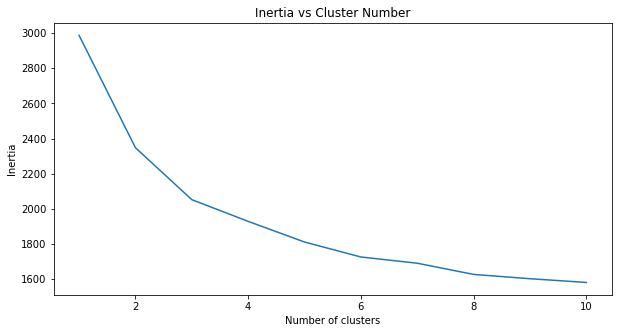

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
scaler.fit(Xx)
Xx=scaler.transform(Xx)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(Xx)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Inertia vs Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### RESULT
From the graph we observe that optimal no of clusters: n_clusters=3

#### VISVAULISATION OF CLUSTERS

In [46]:
# here we are using plotly because since we have more than one features so the clusters mights overlap
#so it will be better to view it in this way
#so before reading this file write pip install plotly in terminal and then open this file-WRITE IN README FILE
import plotly.express as px
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(Xx)
clusters=pd.DataFrame(Xx)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4

### OBSERVATIONS:
So on the basis of above graphs we can conclude that the cars in the given dataset can be grouped into 3 clusters. I guess which can be economical cars, budget luxury cars and luxury cars.

## 4.2) Grouping different models of cars on the basis of thier numerical features

In [47]:
dataset_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 285 entries, Displacement to Model_Zs Ev
dtypes: float64(22), uint8(263)
memory usage: 547.2 KB


#### Improting dataset and Plotting inertia vs cluster number to find the optimal number of clusters

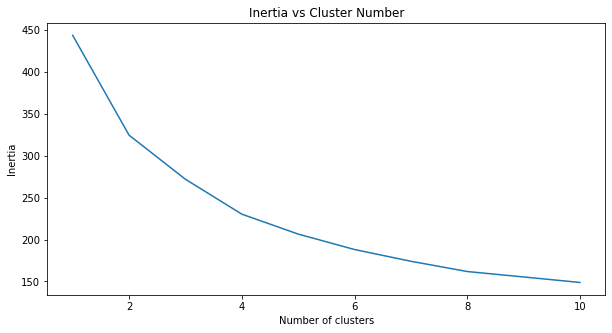

In [48]:
#importing dataset
Z=df_attr.iloc[:,:].values
# plotting inertia vs cluster number to find the optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
scaler.fit(Z)
Z=scaler.transform(Z)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(Z)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Inertia vs Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### RESULT
From the graph we observe that optimal no of clusters: n_clusters=4

#### VISVAULISATION OF CLUSTERS

In [49]:
import plotly.express as px
kmeans = KMeans(
        n_clusters=4, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(Z)
clusters=pd.DataFrame(Z)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig6 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig6

### OBSERVATIONS
Also there is no point of applying clustering on numerical data as none of the values will be similar so we cant group data..

And similarly we cannot apply clustering on categorical data as it will contain a lot of different strings so even if we remove those strings , we wont be able to group cars. 